In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz')
image = image_data.get_fdata()

In [3]:
def region_growing(image, seeds, tol=3, max_iter=100):
    """
    Realiza la segmentación de una imagen utilizando el algoritmo de region growing.
    
    Args:
        image (numpy array): Matriz que representa la imagen a segmentar.
        seeds (list of tuples): Lista de coordenadas (x, y, z) que se utilizan como semillas
                                para iniciar la segmentación.
        tol (float): Tolerancia para la comparación de los valores de los píxeles.
        max_iter (int): Número máximo de iteraciones a realizar.
    
    Returns:
        segmentation (numpy array): Matriz que representa la segmentación de la imagen.
    """
    segmentation = np.zeros_like(image)
    queue = list(seeds)
    mean_cluster = image[seeds].mean()
    prev_mean_cluster = mean_cluster
    iter_count = 0
    
    while queue and iter_count < max_iter:
        curr_pixel = queue.pop(0)
        curr_value = image[curr_pixel]
        
        if np.abs(curr_value - mean_cluster) < tol and segmentation[curr_pixel] == 0:
            segmentation[curr_pixel] = 1
            queue += [(curr_pixel[0]+dx, curr_pixel[1]+dy, curr_pixel[2]+dz)
                      for dx in [-1, 0, 1] for dy in [-1, 0, 1] for dz in [-1, 0, 1]
                      if (0 <= curr_pixel[0]+dx < image.shape[0] and
                          0 <= curr_pixel[1]+dy < image.shape[1] and
                          0 <= curr_pixel[2]+dz < image.shape[2])]
            mean_cluster = image[segmentation == 1].mean()
            if abs(prev_mean_cluster - mean_cluster) < tol:
                break
            prev_mean_cluster = mean_cluster
            iter_count += 1
    
    return segmentation

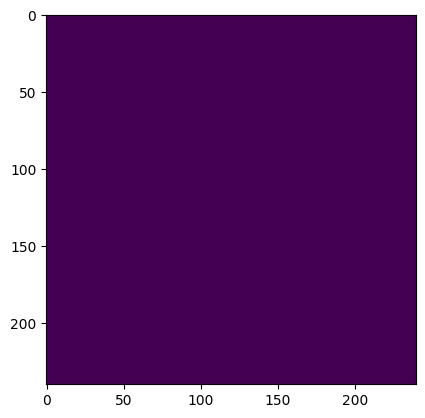

In [4]:
segmentation = region_growing(image, [(10, 20, 5), (20, 30, 10), (40, 30, 20)])
plt.imshow(segmentation[:, :, 20])